# **Fuzzy systems**

<div align = "justify">

**Fuzzy Systems** handle imprecise or vague data using fuzzy logic, where truth values range between 0 and 1 instead of being strictly true or false. This allows a more flexible reasoning.

</div>

<div align = "justify">

### **Exercise 1:** Quality control in Manufacturing using Fuzzy Systems and Expert Rules

* *Objective:* Understand the application of fuzzy systems in quality control, combined with an expert system for rule-based reasoning.

* *Scenario:* You are tasked with designing a quality control system for manufactured products based on their dimensions, weight, and additional expert rules. The dimensions range from 0 to 100 units, and the weight ranges from 0 to 50 kg.
</div>

In [19]:
# Download necesary libraries
# !pip install scikit-fuzzy (This is how it's downloaded in google colab)

import numpy as np # Linear algebra
import matplotlib.pyplot as plt # Visualization
import skfuzzy as fuzz
import skfuzzy.control as ctrl # Import ctrl module (helps handle fuzzy logic)

In [20]:
# Definition of input and output variables
dimension = ctrl.Antecedent(np.arange(0, 101, 1), 'dimension')
weight = ctrl.Antecedent(np.arange(0, 51, 1), 'weight')
quality = ctrl.Consequent(np.arange(0, 11, 1), 'quality')  # Output variable for quality (0-10 scale)
material_type = ctrl.Antecedent(np.arange(0, 2, 1), 'material_type')  # High-Grade or Low-Grade
surface_finish = ctrl.Antecedent(np.arange(0, 2, 1), 'surface_finish')  # Smooth or Rough

# Membership functions for dimension (input)
dimension['Small'] = fuzz.trimf(dimension.universe, [0, 0, 50])
dimension['Medium'] = fuzz.trimf(dimension.universe, [15, 50, 75])
dimension['Large'] = fuzz.trimf(dimension.universe, [50, 100, 100])

# Membership functions for weight (input)
weight['Light'] = fuzz.trimf(weight.universe, [0, 0, 20])
weight['Medium'] = fuzz.trimf(weight.universe, [15, 25, 35])
weight['Heavy'] = fuzz.trimf(weight.universe, [20, 50, 50])

# Membership functions for quality (output)
quality['Low'] = fuzz.trimf(quality.universe, [0, 0, 3])
quality['Medium'] = fuzz.trimf(quality.universe, [2, 5, 8])
quality['High'] = fuzz.trimf(quality.universe, [7, 10, 10])

# Membership functions for material type (input)
material_type['Low-Grade'] = fuzz.trimf(material_type.universe, [0, 0, 1])
material_type['High-Grade'] = fuzz.trimf(material_type.universe, [0, 1, 1])

# Membership functions for surface finish (input)
surface_finish['Rough'] = fuzz.trimf(surface_finish.universe, [0, 0, 1])
surface_finish['Smooth'] = fuzz.trimf(surface_finish.universe, [0, 1, 1])

# Fuzzy rules
rule1 = ctrl.Rule(dimension['Small'] & weight['Light'], quality['Low'])
rule2 = ctrl.Rule(dimension['Medium'] & weight['Medium'], quality['Medium'])
rule3 = ctrl.Rule(dimension['Large'] & weight['Heavy'], quality['High'])

# Expert rule based on material and surface finish
rule4 = ctrl.Rule(material_type['High-Grade'] & surface_finish['Smooth'], quality['High'])
rule5 = ctrl.Rule(material_type['Low-Grade'] & surface_finish['Rough'], quality['Low'])

# Fuzzy control system
diagnosis_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5])
diagnosis_sim = ctrl.ControlSystemSimulation(diagnosis_ctrl)

# Fuzzy control system
diagnosis_sim.input['dimension'] = 90
diagnosis_sim.input['weight'] = 70
diagnosis_sim.input['material_type'] = 1  # High-Grade
diagnosis_sim.input['surface_finish'] = 1  # Smooth

# Compute the result
diagnosis_sim.compute()

# Display the result
print("Quality:", diagnosis_sim.output['quality'])

Quality: 9.0


c:\Users\diego\AppData\Local\Programs\Python\Python312\Lib\site-packages\skfuzzy\control\fuzzyvariable.py:125: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


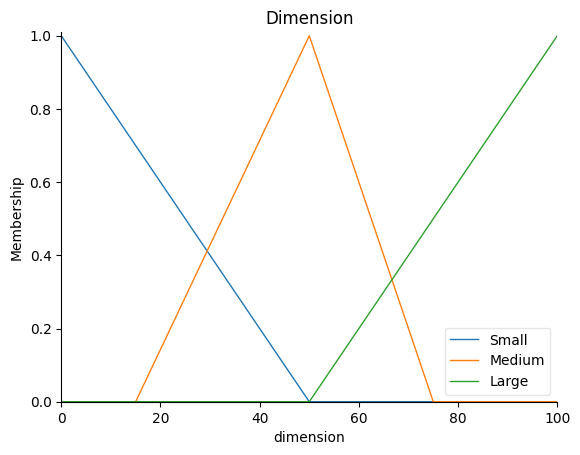

In [21]:
# Graphs
dimension.view()
plt.title("Dimension")
plt.show()

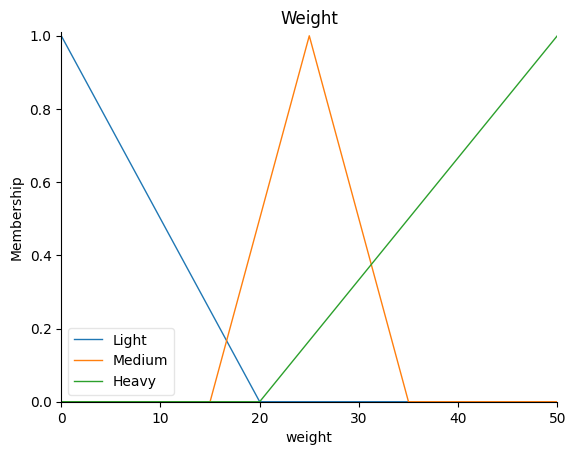

In [22]:
weight.view()
plt.title("Weight")
plt.show()

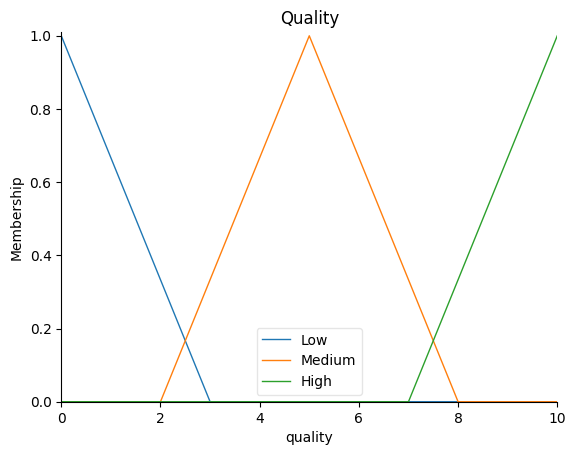

In [23]:
quality.view()
plt.title("Quality")
plt.show()

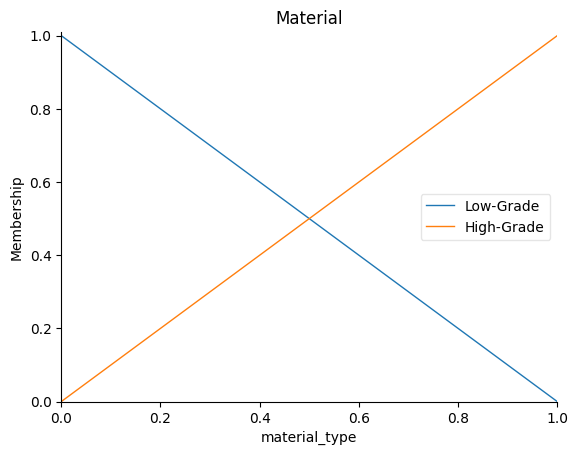

In [24]:
material_type.view()
plt.title("Material")
plt.show()

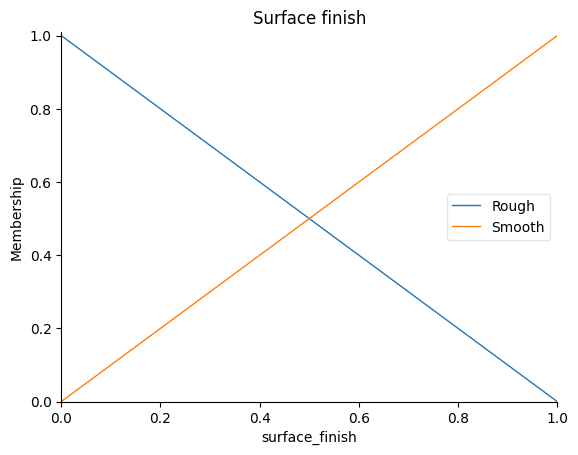

In [25]:
surface_finish.view()
plt.title("Surface finish")
plt.show()

<div align = "justify">

### **Exercise 2: Fuzzy logic for smart home lighting control**

Create a system that adjusts the lighting in a smart home based on the time of day and the occupancy of the rooms using fuzzy logic.

The goal is to maintain optimal lighting conditions for comfort and energy eficiency.

</div>

In [26]:
# Definition of input and output variables
time_of_day = ctrl.Antecedent(np.arange(0, 25, 1), 'time_of_day')  # Time of day (in hours)
occupancy = ctrl.Antecedent(np.arange(0, 2, 1), 'occupancy')  # Occupancy (0: Unoccupied, 1: Occupied)

# Output variable
light_intensity = ctrl.Consequent(np.arange(0, 11, 1), 'light_intensity')  # Lighting intensity (0: Off, 10: High)

# Membership functions for time of day (input)
time_of_day['Morning'] = fuzz.trimf(time_of_day.universe, [0, 6, 12])  # 0 to 6 AM to 12 PM
time_of_day['Afternoon'] = fuzz.trimf(time_of_day.universe, [12, 12, 18])  # 12 PM to 6 PM
time_of_day['Evening'] = fuzz.trimf(time_of_day.universe, [18, 18, 21])  # 6 PM to 9 PM
time_of_day['Night'] = fuzz.trimf(time_of_day.universe, [21, 21, 24])  # 10 PM to 12 AM

# Membership functions for occupancy (input)
occupancy['Occupied'] = fuzz.trimf(occupancy.universe, [0, 1, 1])
occupancy['Unoccupied'] = fuzz.trimf(occupancy.universe, [0, 0, 1])

# Membership functions for lighting intensity (output)
light_intensity['Off'] = fuzz.trimf(light_intensity.universe, [0, 0, 1])
light_intensity['Low'] = fuzz.trimf(light_intensity.universe, [1, 3, 5])
light_intensity['Medium'] = fuzz.trimf(light_intensity.universe, [4, 6, 7])
light_intensity['High'] = fuzz.trimf(light_intensity.universe, [6, 10, 10])

# Define fuzzy rules
rule1_c2 = ctrl.Rule(time_of_day['Morning'] & occupancy['Occupied'], light_intensity['Medium'])
rule2_c2 = ctrl.Rule(time_of_day['Morning'] & occupancy['Unoccupied'], light_intensity['Off'])
rule3_c2 = ctrl.Rule(time_of_day['Afternoon'] & occupancy['Occupied'], light_intensity['Low'])
rule4_c2 = ctrl.Rule(time_of_day['Afternoon'] & occupancy['Unoccupied'], light_intensity['Off'])
rule5_c2 = ctrl.Rule(time_of_day['Evening'] & occupancy['Occupied'], light_intensity['High'])
rule6_c2 = ctrl.Rule(time_of_day['Evening'] & occupancy['Unoccupied'], light_intensity['Low'])
rule7_c2 = ctrl.Rule(time_of_day['Night'] & occupancy['Occupied'], light_intensity['High'])
rule8_c2 = ctrl.Rule(time_of_day['Night'] & occupancy['Unoccupied'], light_intensity['Off'])

# There were added some extra rules in order to handle diferent inputs given for the user,
# mainly for the unoccupied category

# Create the fuzzy control system (add the rules)
lighting_ctrl = ctrl.ControlSystem([rule1_c2, rule2_c2, rule3_c2, rule4_c2,
                                    rule5_c2, rule6_c2, rule7_c2, rule8_c2])
lighting_sim = ctrl.ControlSystemSimulation(lighting_ctrl)

In [27]:
# Example 1

# Time of day = 7 AM (Morning) and occupied = 1 (Occupied)
lighting_sim.input['time_of_day'] = 7 # 7 AM
lighting_sim.input['occupancy'] = 1 # Occupied

# Compute the result
lighting_sim.compute()

# Display the result
print("Lighting Intensity:", round(lighting_sim.output['light_intensity'], 5))

Lighting Intensity: 5.65873


In [28]:
# Example 2

# Time of day = 1 PM (Afternoon) and unoccupied = 0
lighting_sim.input['time_of_day'] = 1  # 1 PM
lighting_sim.input['occupancy'] = 0 # Occupied

# Compute the result
lighting_sim.compute()

# Display the result
print("Lighting Intensity:", round(lighting_sim.output['light_intensity'], 5))

Lighting Intensity: 0.4596


In [29]:
# Example 3

# Time of day = 7 PM (Evening) and occupied = 1
lighting_sim.input['time_of_day'] = 19  # 7 PM
lighting_sim.input['occupancy'] = 1  # Occupied

# Compute the result
lighting_sim.compute()

# Display the result
print("Lighting Intensity:", round(lighting_sim.output['light_intensity'], 5))

Lighting Intensity: 8.55556


In [30]:
# Example 4

# Time of day = 1 PM (Afternoon) and unoccupied = 0
lighting_sim.input['time_of_day'] = 13  # 1 PM
lighting_sim.input['occupancy'] = 0 # Unoccupied

# Compute the result
lighting_sim.compute()

# Display the result
print("Lighting Intensity:", round(lighting_sim.output['light_intensity'], 5))

Lighting Intensity: 0.34127


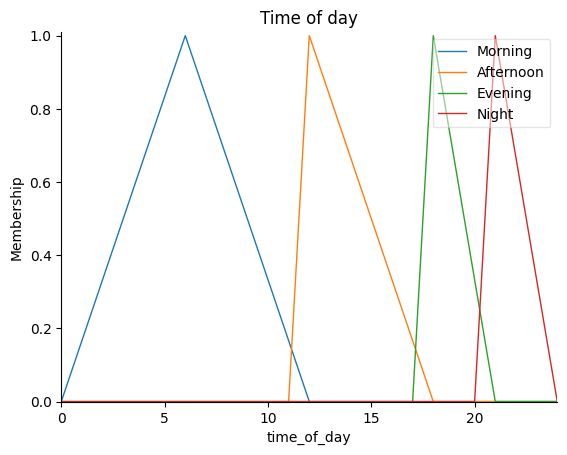

In [31]:
# Graphs
time_of_day.view()
plt.title("Time of day")
plt.show()

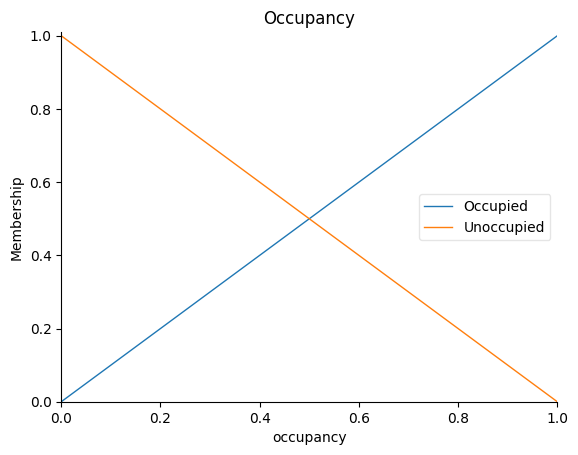

In [32]:
occupancy.view()
plt.title("Occupancy")
plt.show()

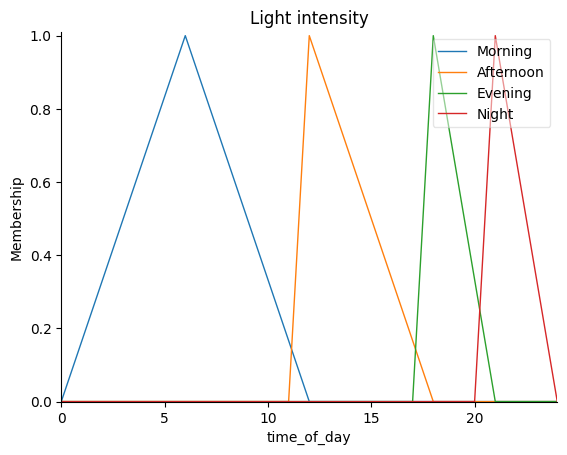

In [33]:
time_of_day.view()
plt.title("Light intensity")
plt.show()